# Week 4A:  More Interactive Data Viz, Working with Raster Data

- Section 401
- Sep 25, 2023

## Housekeeping

- [Homework #1](https://github.com/MUSA-550-Fall-2023/assignment-1) due today
- [Homework #2](https://github.com/MUSA-550-Fall-2023/assignment-2) due in two weeks (10/9)
- Choose a dataset to visualize and explore
    - [OpenDataPhilly](https://opendataphilly.org) or one your choosing
    - Email me if you want to analyze one that's not on OpenDataPhilly

## Week #4 Agenda

**Two parts:**

- Part 1: More interactive data visualization: the HoloViz ecosystem
- Part 2: Getting started with raster data

## Part 1: More interactive data viz

### Recap: The Python data viz landscape

<center>
    <img src="imgs/dataviz-landscape.png" width=700></img>
</center>

### What have we learned so far

#### Matplotlib

- The classic, most flexible library
- Can handle geographic data well
- Overly verbose syntax, syntax is not declarative 


#### Pandas

- Quick, built-in interface
- Not as many features as other libraries

#### Seaborn

- Best for visualizing complex relationships between variables
- Improves matplotlib's syntax: more declarative

#### Altair

- Easy, declarative syntax
- Lots of interactive features
- Complex visualizations with minimal amounts of code

### We'll learn one more today...

<center>
    <img src="imgs/dataviz-landscape-2.png" width=600></img>
</center>

### HoloViz: A set of coordinated visualization libraries in Python

<center>
    <a href=https://holoviz.org/>
        <img src="imgs/holoviz-logo.png" width=200></img>
    </a>
</center>

### The motivation behind HoloViz mirrors the goals of this course

Proper data visualization is crucial throughout all of the steps of the data science pipeline: data wrangling, modeling, and storytelling

<img src="imgs/holoviz-framework.png" width=800></img>

<center>
    <img src="imgs/holoviz-packages.png" width=700></img>
</center>

### Today: `hvPlot`, `Holoviews`, `Geoviews`

### Later in the course: `Datashader`, `Param`, `Panel`

### HoloViz: A quick overview

- **Bokeh**: creating interactive visualizations using Javascript using Python
- **HoloViews**: a declarative, high-level library for creating bokeh visualizations

**Note:** The relationship between Bokeh and Holoviews is similar to Altair and Vega

#### A significant pro

GeoViews builds on HoloViews to add support for geographic data

#### The major cons

- All are relatively new
- Bokeh is the most well-tested
- HoloViews, GeoViews, hvPlot are being actively developed but are very promising

### How does `hvPlot` fit in?


High-level visualization library designed to help you quickly create interactive charts during your data wrangling

**Main uses:**
- Quickly generate interactive plots from your data
- Seamlessly handles pandas and geopandas data
- Relies on Holoviews and Geoviews under the hood

It provides an interface just like the `pandas` plot() function, but **much** more useful.

### Example: let's return to the measles dataset

In [1]:
# Our usual imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Let's load the measles data from week 2

url = "https://raw.githubusercontent.com/MUSA-550-Fall-2022/week-2/main/data/measles_incidence.csv"
measles_data_raw = pd.read_csv(url, skiprows=2, na_values="-")

In [3]:
measles_data_raw.head()

,YEAR,WEEK,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,...,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
0,1928,1,3.67,NaN,1.90,4.11,1.38,8.38,4.50,8.58,...,5.69,22.03,1.18,0.4,0.28,NaN,14.83,3.36,1.54,0.91
1,1928,2,6.25,NaN,6.40,9.91,1.80,6.02,9.00,7.30,...,6.57,16.96,0.63,NaN,0.56,NaN,17.34,4.19,0.96,NaN
2,1928,3,7.95,NaN,4.50,11.15,1.31,2.86,8.81,15.88,...,2.04,24.66,0.62,0.2,1.12,NaN,15.67,4.19,4.79,1.36
3,1928,4,12.58,NaN,1.90,13.75,1.87,13.71,10.40,4.29,...,2.19,18.86,0.37,0.2,6.70,NaN,12.77,4.66,1.64,3.64
4,1928,5,8.03,NaN,0.47,20.79,2.38,5.13,16.80,5.58,...,3.94,20.05,1.57,0.4,6.70,NaN,18.83,7.37,2.91,0.91


#### Convert from wide to long formats...

In [4]:
measles_data = measles_data_raw.melt(
    id_vars=["YEAR", "WEEK"], value_name="incidence", var_name="state"
)

In [5]:
measles_data.head()

,YEAR,WEEK,state,incidence
0,1928,1,ALABAMA,3.67
1,1928,2,ALABAMA,6.25
2,1928,3,ALABAMA,7.95
3,1928,4,ALABAMA,12.58
4,1928,5,ALABAMA,8.03


#### Reminder: plotting with `pandas` 

The default `.plot()` doesn't know which variables to plot.

<Axes: >

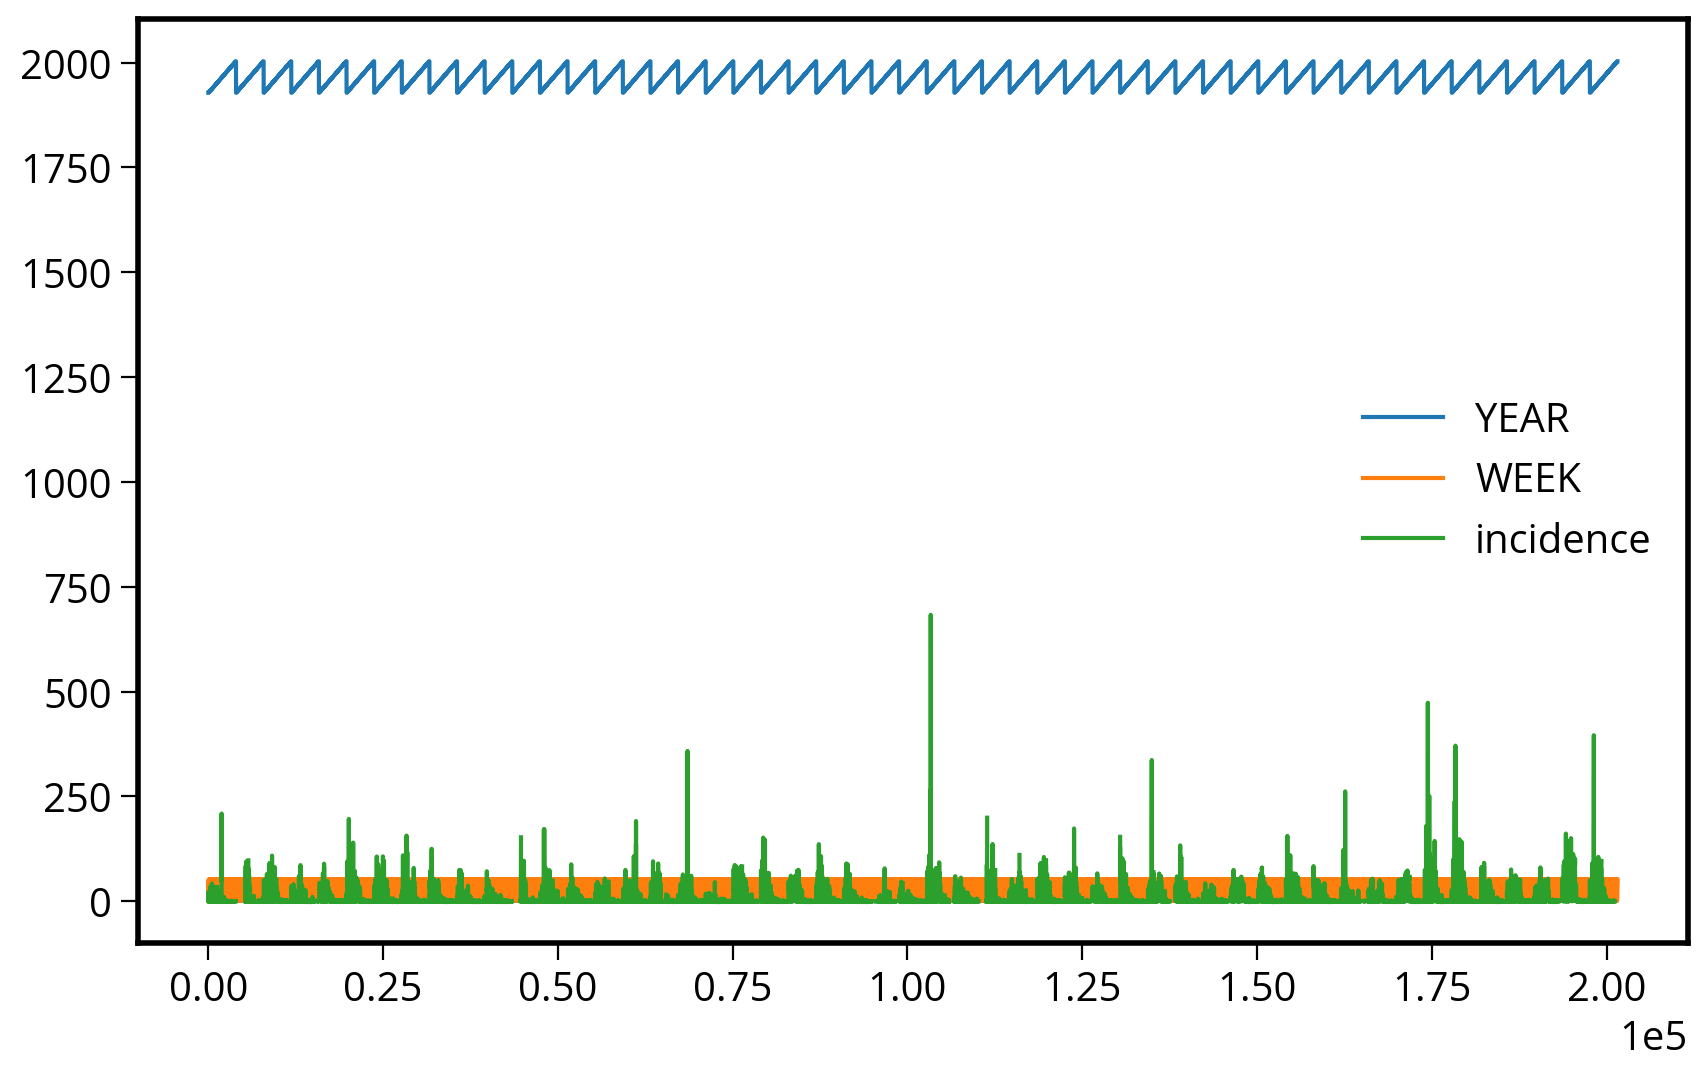

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
measles_data.plot(ax=ax)

But we can group by the year, and plot the national average each year

In [79]:
by_year = measles_data.groupby("YEAR", as_index=False)["incidence"].sum()
by_year.head()

,YEAR,incidence
0,1928,16924.34
1,1929,12060.96
2,1930,14575.11
3,1931,15427.67
4,1932,14481.11


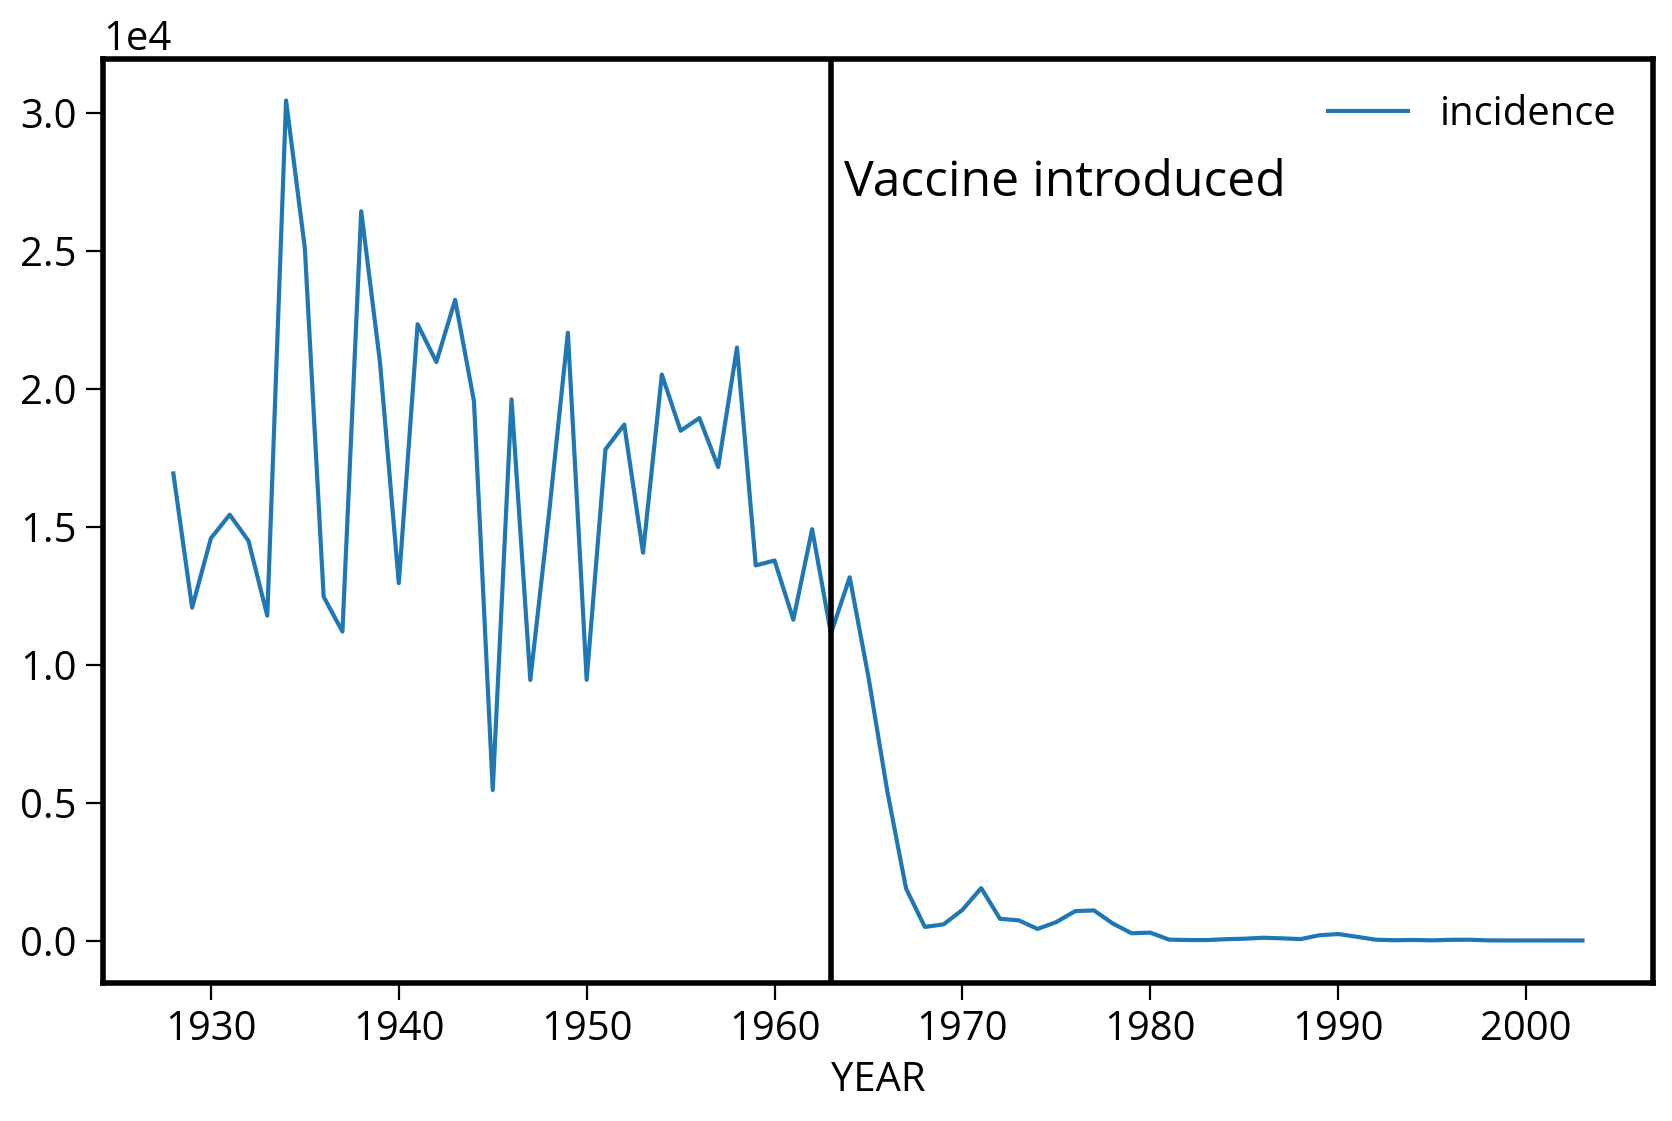

In [81]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the annual average by year
by_year.plot(x='YEAR', y='incidence', ax=ax)

# Add the vaccine year and label
ax.axvline(x=1963, c='k', linewidth=2)
ax.text(1963, 27000, " Vaccine introduced", ha='left', fontsize=18);

#### Adding interactivity with `hvplot`

Use the `.hvplot()` function to create interactive plots.

In [9]:
# This will add the .hvplot() function to your DataFrame!
# Import holoviews too
import holoviews as hv
import hvplot.pandas

# Load bokeh
hv.extension("bokeh")

In [82]:
img = by_year.hvplot(x='YEAR', y='incidence', kind="line")

img

:Curve   [YEAR]   (incidence)

In this case, `.hvplot()` creates a `Holoviews` `Curve` object.

Not unlike `altair` `Chart` objects, it's an object that knows how to translate from your DataFrame data to a visualization.

In [11]:
print(img)

:Curve   [YEAR]   (incidence)


#### Many different chart types are available...

In [83]:
by_year.hvplot(x="YEAR", y="incidence", kind="scatter")

:Scatter   [YEAR]   (incidence)

In [84]:
by_year.hvplot(x='YEAR', y='incidence', kind="bar", rot=90, width=1000)

:Bars   [YEAR]   (incidence)

#### Just like in altair, we can also layer chart elements together

Use the `*` operator to layer together chart elements.

**Note:** the same thing can be accomplished in altair, but with the `+` operator. 

In [85]:
# The line chart of incidence vs year
incidence = by_year.hvplot(x='YEAR', y='incidence', kind="line")

# Vertical line + label for vaccine year
vline = hv.VLine(1963).opts(color="black")
label = hv.Text(1963, 27000, " Vaccine introduced", halign="left")

final_chart = incidence * vline * label
final_chart

:Overlay
   .Curve.I :Curve   [YEAR]   (incidence)
   .VLine.I :VLine   [x,y]
   .Text.I  :Text   [x,y]

#### We can group charts by a specific column, with automatic widget selectors

This is some *powerful magic.*

Let's calculate the annual measles incidence for each year and state:

In [87]:
by_state = measles_data.groupby(["YEAR", "state"], as_index=False)["incidence"].sum()

by_state.head()

,YEAR,state,incidence
0,1928,ALABAMA,334.99
1,1928,ALASKA,0.00
2,1928,ARIZONA,200.75
3,1928,ARKANSAS,481.77
4,1928,CALIFORNIA,69.22


Now, tell `hvplot` to plot produce a chart of incidence over time for each state:

In [88]:
by_state_chart = by_state.hvplot(
    x="YEAR", y="incidence", groupby="state", width=400, kind="line"
)

by_state_chart

:DynamicMap   [state]
   :Curve   [YEAR]   (incidence)

#### We can select out individual charts from the set of grouped objects

Use the dict-like selection syntax: `[key]`

In [89]:
PA = by_state_chart["PENNSYLVANIA"].relabel("PA") # .relabel() is optional — it just changes the title
NJ = by_state_chart["NEW JERSEY"].relabel("NJ")

#### Combine charts as subplots with the `+` operator

In [90]:
combined = PA + NJ

combined

:Layout
   .Curve.PA :Curve   [YEAR]   (incidence)
   .Curve.NJ :Curve   [YEAR]   (incidence)

In [91]:
print(combined)

:Layout
   .Curve.PA :Curve   [YEAR]   (incidence)
   .Curve.NJ :Curve   [YEAR]   (incidence)


The charts are side-by-side by default. You can also specify the number of rows/columns explicitly.

In [92]:
# one column
combined.cols(1)

:Layout
   .Curve.PA :Curve   [YEAR]   (incidence)
   .Curve.NJ :Curve   [YEAR]   (incidence)

#### We can also show overlay lines on the same plot

First, select a subset of states we want to highlight using the `.isin()` function:

In [93]:
states = ["NEW YORK", "NEW JERSEY", "CALIFORNIA", "PENNSYLVANIA"]
sub_states = by_state.loc[ by_state['state'].isin(states) ]

In [95]:
sub_states.head(n=10)

,YEAR,state,incidence
4,1928,CALIFORNIA,69.22
30,1928,NEW JERSEY,797.14
32,1928,NEW YORK,649.97
38,1928,PENNSYLVANIA,583.95
55,1929,CALIFORNIA,72.80
81,1929,NEW JERSEY,181.86
83,1929,NEW YORK,249.09
89,1929,PENNSYLVANIA,489.56
106,1930,CALIFORNIA,760.24
132,1930,NEW JERSEY,602.87


Now, use the **by keyword** to show multiple plots on the same axes:

In [97]:
sub_state_chart = sub_states.hvplot(
    x="YEAR",  # year on x axis
    y="incidence",  # total incidence on y axis
    by="state",  # NEW: multiple states on same axes
    kind="line",
)

sub_state_chart * vline

:Overlay
   .NdOverlay.I :NdOverlay   [state]
      :Curve   [YEAR]   (incidence)
   .VLine.I     :VLine   [x,y]

#### We can also show faceted plots

We can explicitly map variables to rows/columns of our visualization. This is similar to the functionality we saw in altair, when we used the `alt.Chart().facet(column='state')` syntax 

Below, we specify the `state` column should be mapped to each column of the chart:

In [100]:
img = sub_states.reset_index().hvplot(
    x="YEAR",  # year on x axis
    y="incidence",  # total incidence on y axis
    col="state",  # NEW: map the "state" value to each column in the chart
    kind="line",
    rot=90,
    frame_width=200,
)

img * vline

:GridSpace   [state]
   :Overlay
      .Curve.I :Curve   [YEAR]   (incidence)
      .VLine.I :VLine   [x,y]

::: {.callout-note}

Functions for each kind of chart type are available too. Try tab complete on `df.hvplot.` to see the options. You can use these functions directly or use pass the `kind='chart type'` keyword to the `.hvplot()` function.

:::

In [ ]:
by_state.hvplot.

#### For example, we could plot a bar chart for these four states

Let's select a subset by *both* year and state:

In [102]:
# Two selections
sel_year = by_state["YEAR"].isin(range(1960, 1970))
sel_state = by_state["state"].isin(states)

# Use the boolean AND operator: &
sel = sel_year & sel_state

# Grouped bar chart for the desired states and years
by_state.loc[sel].hvplot.bar(x="YEAR", y="incidence", by="state", rot=90)

:Bars   [YEAR,state]   (incidence)

Change `bar()` to `line()` and we get the same thing as before.

In [103]:
by_state.loc[sel].hvplot.line(x="YEAR", y="incidence", by="state", rot=90)

:NdOverlay   [state]
   :Curve   [YEAR]   (incidence)

#### Customizing charts

See the help message for explicit hvplot functions:

In [ ]:
by_state.hvplot.line?

### Can we reproduce the WSJ measles heatmap?

Reminder: we reproduced the [WSJ measles heatmap](http://graphics.wsj.com/infectious-diseases-and-vaccines/) using altair in week 2

Take a look at the help function for the `.hvplot.heatmap()` function:

In [141]:
measles_data.hvplot.heatmap?

Signature:
measles_data.hvplot.heatmap(
    x=None,
    y=None,
    C=None,
    colorbar=True,
    *,
    alpha,
    annular_alpha,
    annular_color,
    annular_fill_alpha,
    annular_fill_color,
    annular_hover_alpha,
    annular_hover_color,
    annular_hover_fill_alpha,
    annular_hover_fill_color,
    annular_hover_line_alpha,
    annular_hover_line_cap,
    annular_hover_line_color,
    annular_hover_line_dash,
    annular_hover_line_join,
    annular_hover_line_width,
    annular_line_alpha,
    annular_line_cap,
    annular_line_color,
    annular_line_dash,
    annular_line_join,
    annular_line_width,
    annular_muted,
    annular_muted_alpha,
    annular_muted_color,
    annular_muted_fill_alpha,
    annular_muted_fill_color,
    annular_muted_line_alpha,
    annular_muted_line_cap,
    annular_muted_line_color,
    annular_muted_line_dash,
    annular_muted_line_join,
    annular_muted_line_width,
    annular_nonselection_alpha,
    annular_nonselection_color,
    an

### Two methods:

We want to plot 'YEAR' on the x axis, 'state' on the y axis, and specify 'incidence' as the values begin plotted in each heatmap bin.

1. You can use the `by_state` data frame which has already summed over weeks for each state
1. Use the original, tidy data (`measles_data`) with columns for state, week, year, and incidence
    - You will need to use the `reduce_function` keyword to sum over weeks

#### Method #1

Use our aggregated dataframe: `by_state`

In [108]:
by_state.head()

,YEAR,state,incidence
0,1928,ALABAMA,334.99
1,1928,ALASKA,0.00
2,1928,ARIZONA,200.75
3,1928,ARKANSAS,481.77
4,1928,CALIFORNIA,69.22


In [ ]:
hvplot

In [138]:
# METHOD #1: just plot the incidence
heatmap = by_state.hvplot.heatmap(
    x="YEAR",  # x-axis
    y="state",  # y-axis
    C="incidence",  # color in each heatmap box
    cmap="viridis",  # color map to use
    height=500,
    width=800,
    flip_yaxis=True,
    rot=90,
)

# Turn off tools
heatmap = heatmap.opts(default_tools=[])

# Change the axes labels
heatmap = heatmap.redim(
    state="State",
    YEAR="Year",
)

heatmap

:HeatMap   [Year,State]   (incidence)

#### Method #2

Pass in the original data and have `hvplot` do the aggregation for us, using the `reduce_function` keyword:

In [128]:
measles_data.head()

,YEAR,WEEK,state,incidence
0,1928,1,ALABAMA,3.67
1,1928,2,ALABAMA,6.25
2,1928,3,ALABAMA,7.95
3,1928,4,ALABAMA,12.58
4,1928,5,ALABAMA,8.03


In [137]:
## METHOD 2: hvplot does the aggregation
heatmap = measles_data.hvplot.heatmap(
    x="YEAR",
    y="state",
    C="incidence",
    cmap="viridis",
    reduce_function=np.sum,  # NEW: Aggregate and sum incidence
    height=500,
    width=800,
    flip_yaxis=True,
    rot=90,
)

# Turn off tools
heatmap = heatmap.opts(default_tools=[])

# Relabel axes
heatmap = heatmap.redim(state="State", YEAR="Year")

heatmap

:HeatMap   [Year,State]   (incidence)

#### Just like altair: save the file as html

In [139]:
import hvplot

hvplot.save(heatmap, "measles.html")

In [140]:
# load the html file and display it
from IPython.display import HTML

HTML("measles.html")

### Two more useful features:

1. Scatter matrix plots
1. Explorer mode

#### 1. Scatter matrix plots

Visualizing relationships between variables, as we have seen in [seaborn](https://seaborn.pydata.org/examples/scatterplot_matrix.html) and [altair](https://altair-viz.github.io/gallery/scatter_matrix.html)

Let's load the penguins data set from week 2

In [142]:
url = "https://raw.githubusercontent.com/MUSA-550-Fall-2022/week-2/master/data/penguins.csv"
penguins = pd.read_csv(url)

In [143]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Use the `hvplot.scatter_matrix()` function:

In [144]:
penguins.hvplot.scatter?

Signature:
penguins.hvplot.scatter(
    x=None,
    y=None,
    *,
    alpha,
    angle,
    cmap,
    color,
    fill_alpha,
    fill_color,
    hover_alpha,
    hover_color,
    hover_fill_alpha,
    hover_fill_color,
    hover_line_alpha,
    hover_line_cap,
    hover_line_color,
    hover_line_dash,
    hover_line_join,
    hover_line_width,
    line_alpha,
    line_cap,
    line_color,
    line_dash,
    line_join,
    line_width,
    marker,
    muted,
    muted_alpha,
    muted_color,
    muted_fill_alpha,
    muted_fill_color,
    muted_line_alpha,
    muted_line_cap,
    muted_line_color,
    muted_line_dash,
    muted_line_join,
    muted_line_width,
    nonselection_alpha,
    nonselection_color,
    nonselection_fill_alpha,
    nonselection_fill_color,
    nonselection_line_alpha,
    nonselection_line_cap,
    nonselection_line_color,
    nonselection_line_dash,
    nonselection_line_join,
    nonselection_line_width,
    palette,
    selection_alpha,
    selection_color,


In [151]:
columns = ["flipper_length_mm", "bill_length_mm", "body_mass_g", "species"]
hvplot.scatter_matrix(penguins[columns], c="species")

:GridMatrix   [X,Y]
   :NdOverlay   [species]
      :Histogram   [flipper_length_mm]   (flipper_length_mm_count)

Note the "box select" and "lasso" features on the tool bar for interactions

#### 2. Explorer mode

- An interactive interface that allows you to easily generate customized plots, which makes it easy to explore both your data and hvPlot’s options, parameters, etc. 
- New feature just released!


In [152]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [153]:
hvexplorer = hvplot.explorer(penguins)
hvexplorer

hvDataFrameExplorer(axes=Axes(explorer=..., height=None, legend='right', logx=False, logy=False, name='Axes41984', responsive=False, shared_axes=True, width=None, xlim=None, ylim=None), by=[], colormapping=Colormapping(clim=None, cmap='kbc_r', cnorm='linear', color=None, colorbar=None, explorer=..., name='Colormapping42044', rescale_discrete_levels=True, symmetric=False), groupby=[], kind='line', labels=Labels(clabel='', explorer=..., fontscale=1, name='Labels42091', rot=0, title='', xlabel='', ylabel=''), name='hvDataFrameExplorer41951', operations=Operations(aggregator=None, datashade=False, dynspread=False, explorer=..., name='Operations42135', rasterize=False, x_sampling=None, y_sampling=None), style=Style(alpha=1, explorer=..., name='Style42179'), x='index', y='species', y_multi=[], z=None)

Get the code for your customized plot!

You can export the current state of the explorer by running `hvexplorer.plot_code()` 


In [162]:
hvexplorer.plot_code()

"df.hvplot(by=['species'], colorbar=True, kind='scatter', title='Bill Depth vs. Bill Length by Species', x='bill_depth_mm', xlabel='Bill Depth (mm)', y=['bill_length_mm'], ylabel='Bill Length (mm)')"

In [163]:
penguins.hvplot(
    by=["species"],
    colorbar=True,
    kind="scatter",
    title="Bill Depth vs. Bill Length by Species",
    x="bill_depth_mm",
    xlabel="Bill Depth (mm)",
    y=["bill_length_mm"],
    ylabel="Bill Length (mm)",
)

:NdOverlay   [species]
   :Scatter   [bill_depth_mm]   (bill_length_mm)

### Recap: altair vs hvplot

- Both use a declarative syntax (altair more so than hvplot)
- Users of ggplot might be more familiar with altair's syntax
- hvplot integrates directly into pandas dataframes via the `.hvplot()` function
- Both have support for cross-filtering and interactions
- Both can be incorporated into web-based dashboard via HTML (later in course)
- hvplot has better support for large data (later in course)

**It's largely up to you which one you feel is easier to use**

### hvplot can also be used with geopandas!

Let's load some geographic data for countries:

In [167]:
import geopandas as gpd

world = gpd.read_file("data/ne_110m_admin_0_countries")

In [168]:
world.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


Plotting with just geopandas:

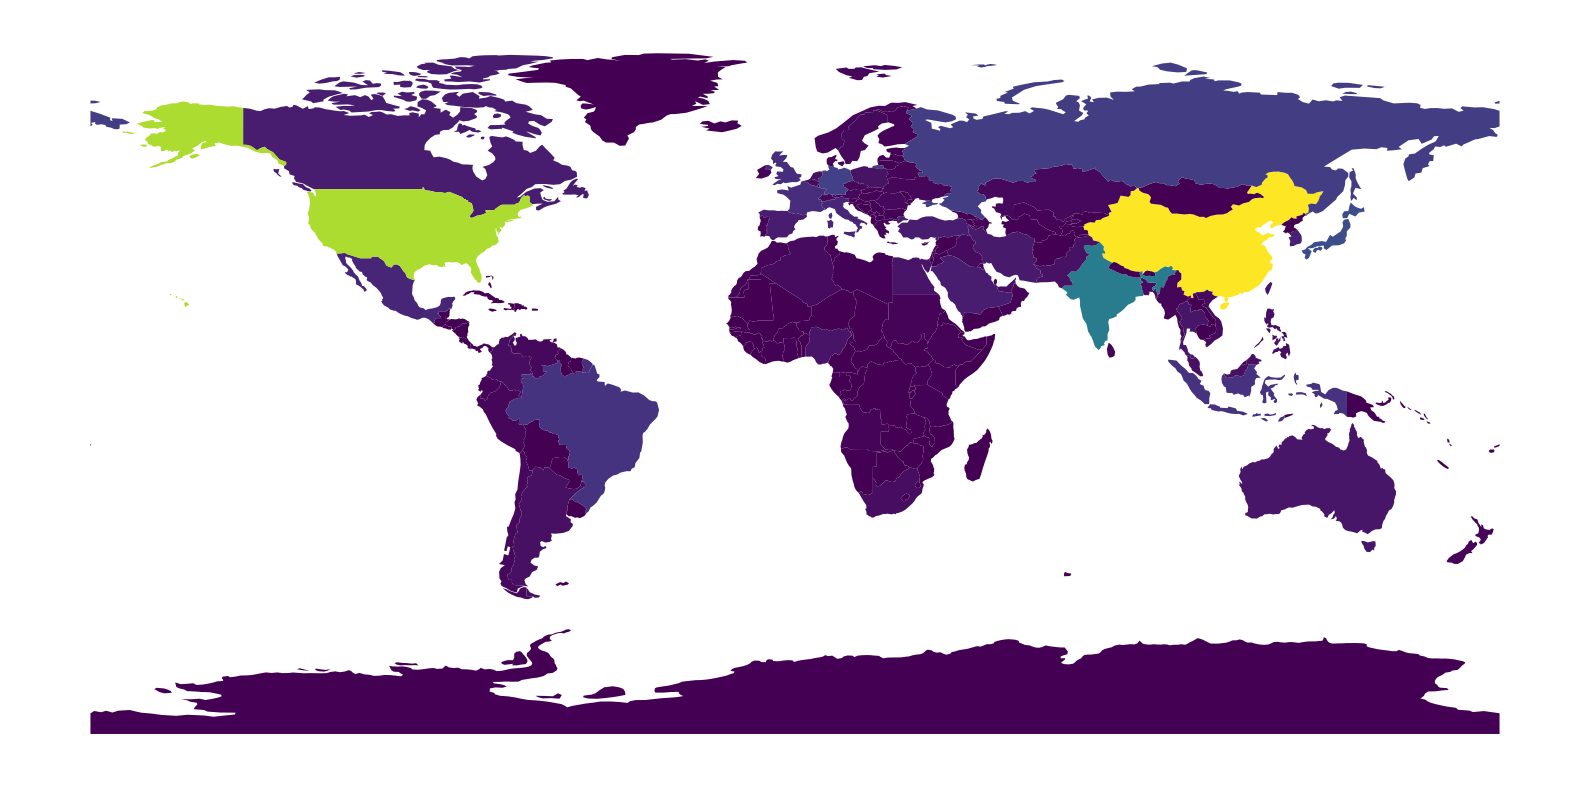

In [169]:
fig, ax = plt.subplots(figsize=(10, 10))
world.plot(column="gdp_md_est", ax=ax)
ax.set_axis_off()

Now with hvplot:

In [170]:
world.hvplot.polygons?

Signature:
world.hvplot.polygons(
    x=None,
    y=None,
    c=None,
    *,
    alpha,
    cmap,
    color,
    fill_alpha,
    fill_color,
    hover_alpha,
    hover_color,
    hover_fill_alpha,
    hover_fill_color,
    hover_line_alpha,
    hover_line_cap,
    hover_line_color,
    hover_line_dash,
    hover_line_join,
    hover_line_width,
    line_alpha,
    line_cap,
    line_color,
    line_dash,
    line_join,
    line_width,
    muted,
    muted_alpha,
    muted_color,
    muted_fill_alpha,
    muted_fill_color,
    muted_line_alpha,
    muted_line_cap,
    muted_line_color,
    muted_line_dash,
    muted_line_join,
    muted_line_width,
    nonselection_alpha,
    nonselection_color,
    nonselection_fill_alpha,
    nonselection_fill_color,
    nonselection_line_alpha,
    nonselection_line_cap,
    nonselection_line_color,
    nonselection_line_dash,
    nonselection_line_join,
    nonselection_line_width,
    selection_alpha,
    selection_color,
    selection_fill_alpha,


In [171]:
# Can also just do world.hvplot()
world.hvplot.polygons(c="gdp_md_est", geo=True, frame_height=400, logz=True)

:Polygons   [Longitude,Latitude]   (gdp_md_est)

## Example: median assessment values per neighborhood

Let's return to the property assessment data we used last week.

In [226]:
# Load the data
url = "https://raw.githubusercontent.com/MUSA-550-Fall-2022/week-3/master/data/opa_residential.csv"
data = pd.read_csv(url)

# Create the Point() objects
data["geometry"] = gpd.points_from_xy(data["lng"], data["lat"])

# Create the GeoDataFrame
data = gpd.GeoDataFrame(data, geometry="geometry", crs="EPSG:4326")

In [227]:
# load the Zillow data from GitHub
url = "https://raw.githubusercontent.com/MUSA-550-Fall-2022/week-3/master/data/zillow_neighborhoods.geojson"
zillow = gpd.read_file(url)

In [228]:
# Important: Make sure the CRS match
data = data.to_crs(zillow.crs)

# perform the spatial join
data = gpd.sjoin(data, zillow, predicate="within", how="left")

In [229]:
# Calculate the median market value per Zillow neighborhood
median_values = data.groupby("ZillowName", as_index=False)["market_value"].median()

# Merge median values with the Zillow geometries
median_values = zillow.merge(median_values, on="ZillowName")
print(type(median_values))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [230]:
median_values.head()

,ZillowName,geometry,market_value
0,Academy Gardens,"POLYGON ((-74.99851 40.06435, -74.99456 40.061...",185950.0
1,Allegheny West,"POLYGON ((-75.16592 40.00327, -75.16596 40.003...",34750.0
2,Andorra,"POLYGON ((-75.22463 40.06686, -75.22588 40.065...",251900.0
3,Aston Woodbridge,"POLYGON ((-75.00860 40.05369, -75.00861 40.053...",183800.0
4,Bartram Village,"POLYGON ((-75.20733 39.93350, -75.20733 39.933...",48300.0


In [231]:
median_values.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The data is in EPSG=4326 — hvplot knows how to handle this automatically:

In [232]:
# pass arguments directly to hvplot()
# and it recognizes polygons automatically
median_values.hvplot(
    c="market_value",
    frame_width=600,
    frame_height=600,
    geo=True,
    cmap="viridis",
    hover_cols=["ZillowName"],
)

:Polygons   [Longitude,Latitude]   (market_value,ZillowName)

::: {.callout-important title="The 'geo=True' keyword"}

Note that the `geo=True` assumes EPSG:4326. If you specify `geo=True`, the data needs to be in typical lat/lng CRS. If not, you can use the `crs` keyword to specify the type of CRS your data is in.

:::

As an example, let's convert our data to EPSG:3857 and try to plot it:

In [233]:
median_values_3857 = median_values.to_crs(epsg=3857)

In [234]:
median_values_3857.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [235]:
median_values_3857.hvplot(
    c="market_value",
    frame_width=600,
    frame_height=600,
    geo=True,
    crs=3857,  # NEW: specify the CRS
    cmap="viridis",
    hover_cols=["ZillowName"],
)

:Polygons   [Longitude,Latitude]   (market_value,ZillowName)

### Adding in tile maps underneath with geoviews

Let's add a tile source underneath the choropleth map

In [236]:
import geoviews as gv
import geoviews.tile_sources as gvts

In [237]:
type(gvts.EsriImagery)

geoviews.element.geo.WMTS

In [239]:
%%opts WMTS [width=800, height=800, xaxis=None, yaxis=None]

choro = median_values_3857.hvplot(
    c="market_value",
    frame_width=500,
    frame_height=600,
    alpha=0.5,
    geo=True,
    crs=3857,
    cmap="viridis",
    hover_cols=["ZillowName"],
)

gvts.EsriImagery * choro

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (market_value,ZillowName)

::: {.callout-warning}

For the moment, you'll need to have your overlaid polygons in Web Mercator, EPSG:3857. There's a bug in geoviews that is preventing the underlying raster data from showing properly when combined with data that is using a different CRS.

:::

### Many of the most common tile sources are available..

In [240]:
%%opts WMTS [width=200, height=200, xaxis=None, yaxis=None]

(
    gvts.OSM
    + gvts.StamenToner
    + gvts.EsriNatGeo
    + gvts.EsriImagery
    + gvts.EsriUSATopo
    + gvts.EsriTerrain
    + gvts.CartoDark
    + gvts.CartoLight
).cols(4)

:Layout
   .WMTS.I    :WMTS   [Longitude,Latitude]
   .WMTS.II   :WMTS   [Longitude,Latitude]
   .WMTS.III  :WMTS   [Longitude,Latitude]
   .WMTS.IV   :WMTS   [Longitude,Latitude]
   .WMTS.V    :WMTS   [Longitude,Latitude]
   .WMTS.VI   :WMTS   [Longitude,Latitude]
   .WMTS.VII  :WMTS   [Longitude,Latitude]
   .WMTS.VIII :WMTS   [Longitude,Latitude]

**Note**: we've used the `%%opts` cell magic to apply syling options to any charts generated in the cell.

See [the documentation guide on customizations](http://holoviews.org/user_guide/Notebook_Magics.html) for more details.

### What about interactive hex bins?

You can do it with hvplot!

#### Step 1: Extract out the x/y values of the data 

- Let's add them as new columns into the data frame
- Remember, you can the use "x" and "y" attributes of the "geometry" column.

In [241]:
data["x"] = data.geometry.x
data["y"] = data.geometry.y

In [242]:
data.head()

,parcel_number,lat,lng,location,market_value,building_value,land_value,total_land_area,total_livable_area,geometry,index_right,ZillowName,x,y
0,71361800,39.991575,-75.128994,2726 A ST,62200.0,44473.0,17727.0,1109.69,1638.0,POINT (-75.12899 39.99158),79.0,McGuire,-75.128994,39.991575
1,71362100,39.991702,-75.128978,2732 A ST,25200.0,18018.0,7182.0,1109.69,1638.0,POINT (-75.12898 39.99170),79.0,McGuire,-75.128978,39.991702
2,71362200,39.991744,-75.128971,2734 A ST,62200.0,44473.0,17727.0,1109.69,1638.0,POINT (-75.12897 39.99174),79.0,McGuire,-75.128971,39.991744
3,71362600,39.991994,-75.128895,2742 A ST,15500.0,11083.0,4417.0,1109.69,1638.0,POINT (-75.12889 39.99199),79.0,McGuire,-75.128895,39.991994
4,71363800,39.992592,-75.128743,2814 A ST,31300.0,22400.0,8900.0,643.50,890.0,POINT (-75.12874 39.99259),79.0,McGuire,-75.128743,39.992592


#### Step 2: Create a new DataFrame with only the columns we need

- In this case, we'll use the `x` and `y` coordinate columns and the associated `market_value` column
- **Important:** you'll also need to include the `geometry` column!

In [244]:
subdata = data[["x", "y", "market_value", "geometry"]]

In [245]:
type(subdata)

geopandas.geodataframe.GeoDataFrame

#### Step 3: Plot with the hexbin function

- Similar syntax to matplotlib's hexbin() function
- Specify:
    - The x/y coordinates, 
    - An optional `C` column to aggregate for each bin (raw counts are shown if not provided)
    - A `reduce_function` that determines how to aggregate the `C` column

In [217]:
data.hvplot.hexbin?

Signature:
data.hvplot.hexbin(
    x=None,
    y=None,
    C=None,
    colorbar=True,
    *,
    alpha,
    cmap,
    color,
    fill_alpha,
    fill_color,
    hover_alpha,
    hover_color,
    hover_fill_alpha,
    hover_fill_color,
    hover_line_alpha,
    hover_line_cap,
    hover_line_color,
    hover_line_dash,
    hover_line_join,
    hover_line_width,
    line_alpha,
    line_cap,
    line_color,
    line_dash,
    line_join,
    line_width,
    muted,
    muted_alpha,
    muted_color,
    muted_fill_alpha,
    muted_fill_color,
    muted_line_alpha,
    muted_line_cap,
    muted_line_color,
    muted_line_dash,
    muted_line_join,
    muted_line_width,
    nonselection_alpha,
    nonselection_color,
    nonselection_fill_alpha,
    nonselection_fill_color,
    nonselection_line_alpha,
    nonselection_line_cap,
    nonselection_line_color,
    nonselection_line_dash,
    nonselection_line_join,
    nonselection_line_width,
    scale,
    selection_alpha,
    selection_color,

In [246]:
subdata.head()

,x,y,market_value,geometry
0,-75.128994,39.991575,62200.0,POINT (-75.12899 39.99158)
1,-75.128978,39.991702,25200.0,POINT (-75.12898 39.99170)
2,-75.128971,39.991744,62200.0,POINT (-75.12897 39.99174)
3,-75.128895,39.991994,15500.0,POINT (-75.12889 39.99199)
4,-75.128743,39.992592,31300.0,POINT (-75.12874 39.99259)


*Note:* This will take a minute or two!

In [247]:
data.hvplot.hexbin(
    x="x",
    y="y",
    C="market_value",
    reduce_function=np.median,  # Use the median to aggregate in bins
    logz=True,
    geo=True,
    gridsize=40,  # The number of cells in the x/y directions
    cmap="viridis",
)

:HexTiles   [x,y]   (market_value)

## Documentation references

- [Hvplot user guide](https://hvplot.pyviz.org/user_guide/index.html)
- [HoloViz tutorial](https://holoviz.org/talks/index.html): introduction to the HoloViz ecosystem
- [HoloViews user guide](http://holoviews.org/user_guide/index.html) and [gallery](http://holoviews.org/gallery/index.html)
- [GeoViews user guide](http://geoviews.org/user_guide/index.html) and [gallery](http://geoviews.org/gallery/index.html)

Some **very cool** examples available in the galleries

## That's it!

- Homework #1 is due today by the end of the day
- Homework #2 due two weeks from today
- Wednesday we'll dive into raster data analysis!